In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
cd ./logistic model project 

[Errno 2] No such file or directory: './logistic model project'
/content/drive/MyDrive/Colab Notebooks


In [14]:
ls

 1_Python/
 2_Pandas/
'3 Regression model projet'/
'logistic model project '/
 Master_Data_Analysis_with_Python_-_Intro_to_Pandas_by_Ted_Petrou_20211123.zip


## Import the Data 

In [4]:
# first we import the essential libarery we will need 
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [51]:
# name='housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'
df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']].describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


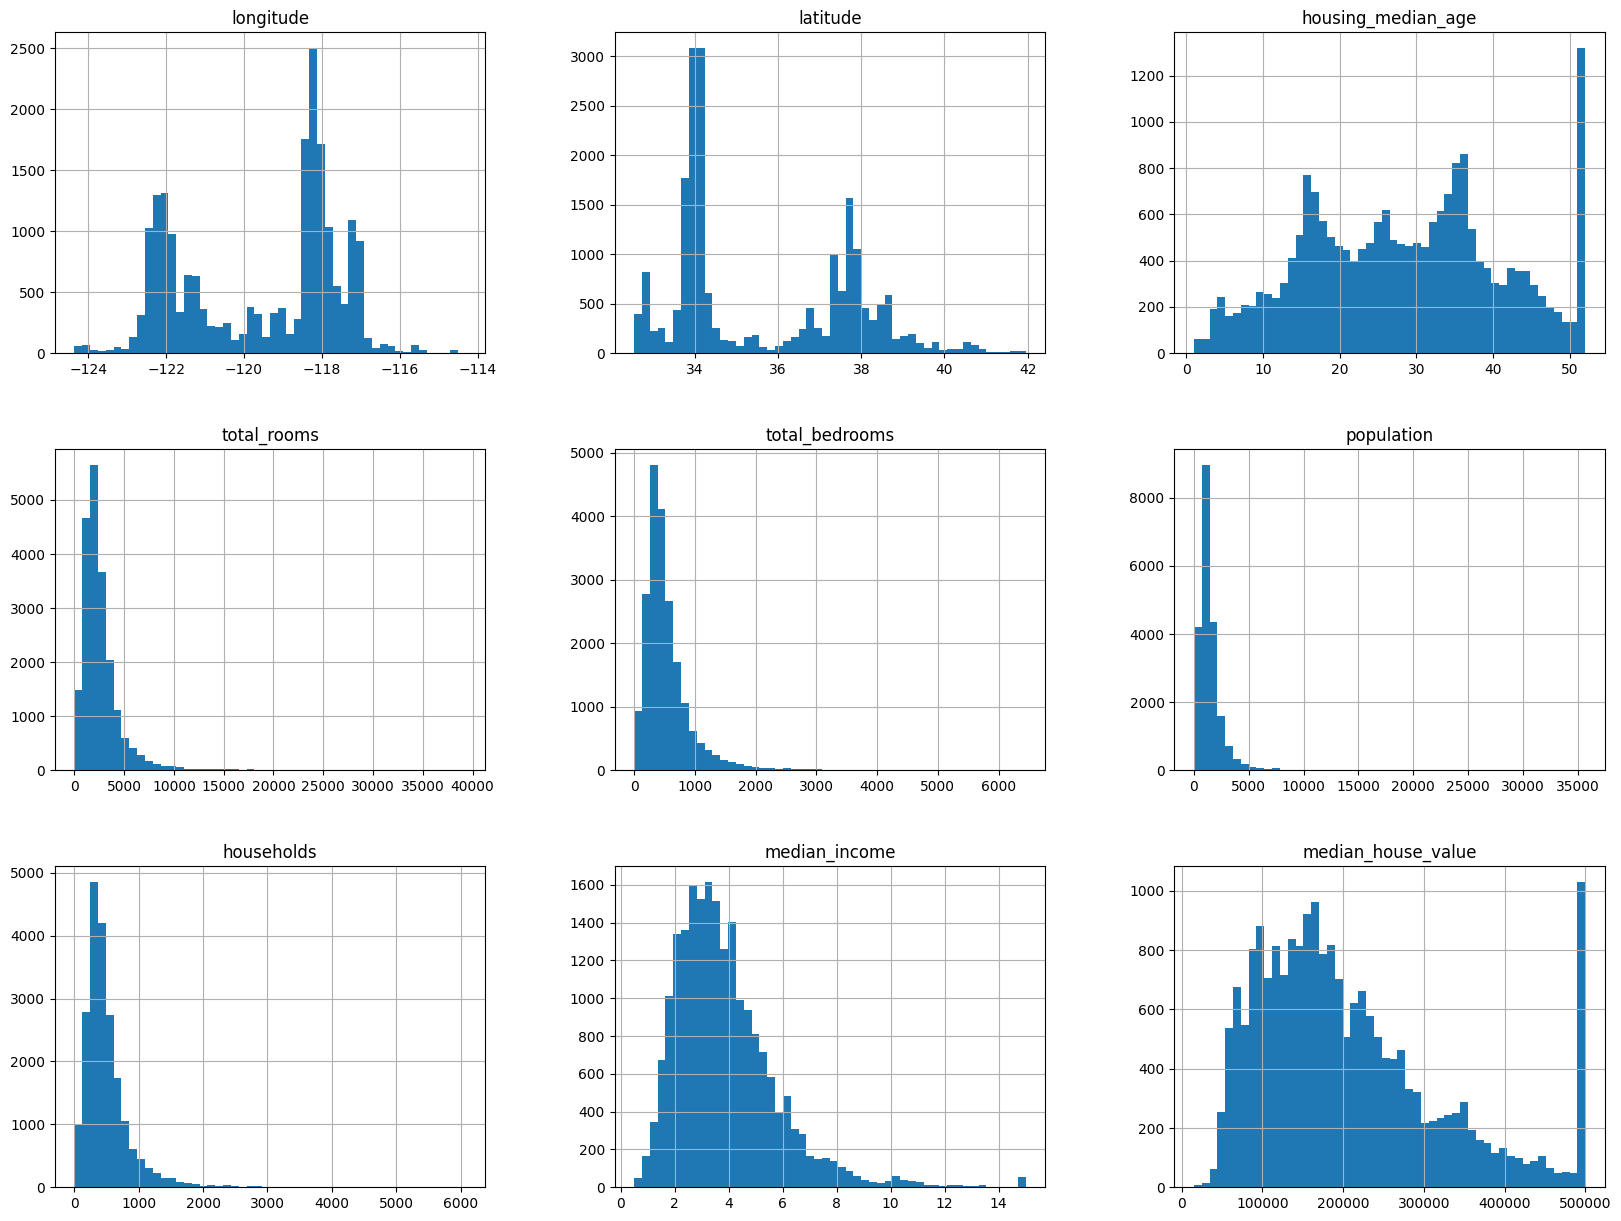

In [5]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

to not  let your brain take a look and detect pattern, which means that it
is highly prone to overfitting: if you look at the test set, you may stumble upon
some seemingly interesting pattern in the test data that leads you to select a
particular kind of Machine Learning model. When you estimate thegeneralization error using the test set, your estimate will be too optimistic, and
you will launch a system that will not perform as well as expected. *This* is called
**data snooping bias**.

**we should split daata into train and test **



In [7]:
training_data = df.sample(frac=0.8, random_state=25)
# random_state which corresponds to the seed, so that results are reproducible.
# because if you run the program again, it will
# generate a different test set! Over time, you (or your Machine Learning
# algorithms) will get to see the whole dataset, which is what you want to avoid.
testing_data = df.drop(training_data.index)

In [8]:
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY
8944,-118.47,34.01,43.0,1160.0,304.0,393.0,250.0,2.9167,461100.0,<1H OCEAN
3737,-118.40,34.17,27.0,3588.0,911.0,1891.0,871.0,3.4013,286000.0,<1H OCEAN
19092,-122.62,38.24,19.0,1687.0,253.0,893.0,257.0,6.2040,201800.0,<1H OCEAN
9493,-123.75,39.37,16.0,1377.0,296.0,830.0,279.0,3.2500,151400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
2051,-119.72,36.71,7.0,2456.0,463.0,1350.0,424.0,3.0179,91600.0,INLAND
11268,-117.97,33.79,33.0,3268.0,641.0,1704.0,591.0,3.6849,211400.0,<1H OCEAN
20584,-121.95,38.65,19.0,1265.0,228.0,755.0,218.0,3.3472,69800.0,INLAND
18612,-122.07,37.08,21.0,5639.0,894.0,2670.0,871.0,6.0809,270000.0,NEAR OCEAN


**We can also do the splitting using Sickit learning**

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2,random_state=42)

In [10]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


Medain icome is a very important varibale for our target with is median house value
so we want to benefits from it 

In [11]:
df["income_cat"] = pd.cut(df["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [13]:
df['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

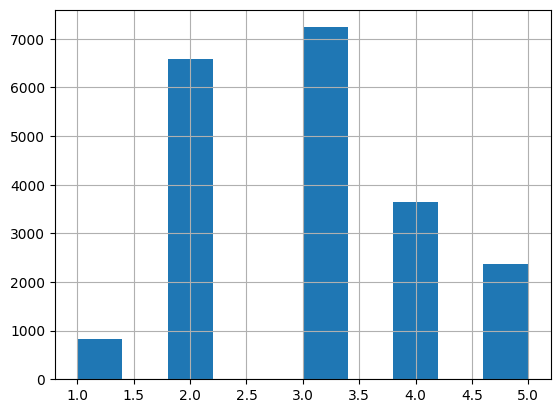

In [12]:
df["income_cat"].hist()

**stratified sampling**
splitting the data so the training and test samples will be representative (ie. respecting the pourcountage of each value count on the target variable or any other variale that you think that its important)

PS: that will help data to be balanced 


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df,df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [15]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [16]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

as we can see here the portion of eath category is equal in both training and testing data 

now we should delete the income_cat to back to original data 

In [17]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

##Discover and Visualize the Data to Gain Insights

In [22]:
#lets creat an copy of the train so we have an insight without risking changing something in the data
df_plot = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

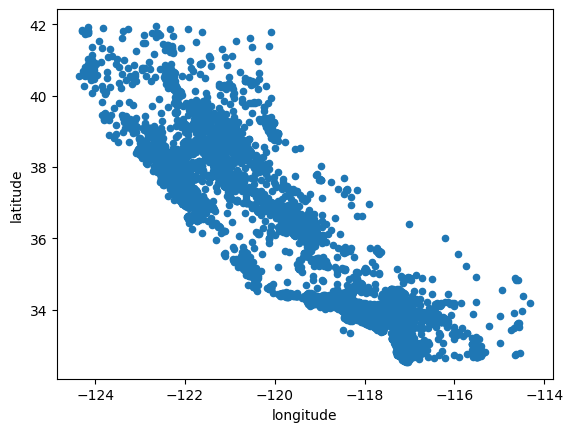

In [21]:
df_plot.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

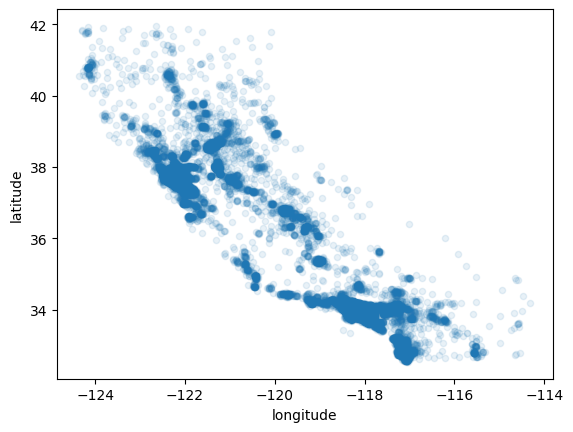

In [23]:
df_plot.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

In [30]:
# import matplotlib as plt
import matplotlib.pyplot as plt
# cmap = plt.cm.get_cmap('Reds')

lets look at the housing prices based on the location

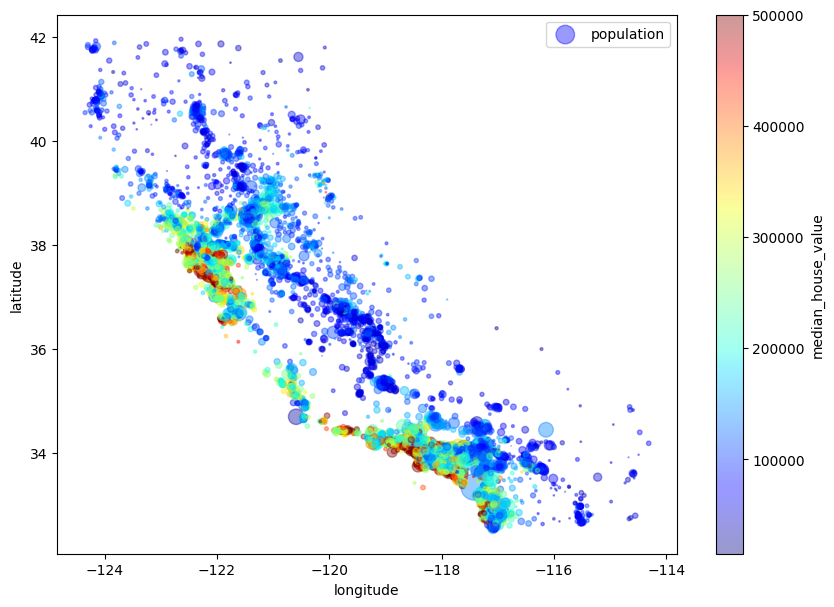

In [31]:
df_plot.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df_plot["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density

### Looking for Correlations between variables

In [32]:
corr_matrix = df_plot.corr()

<ipython-input-32-4284cf8f1cd7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_plot.corr()


In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)
#this show how each variable is signitative to the median ouse value  variabale 

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The most promising attribute to predict the median house value is the median
income

<Axes: xlabel='median_income', ylabel='median_house_value'>

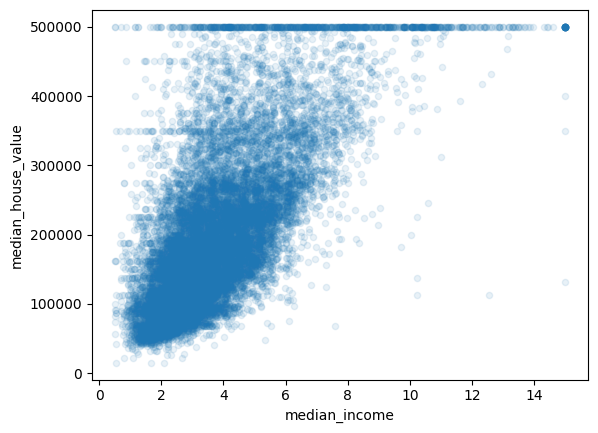

In [35]:
df_plot.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [36]:
df_plot["rooms_per_household"] =df_plot["total_rooms"]/df_plot["households"]
df_plot["bedrooms_per_room"] =df_plot["total_bedrooms"]/df_plot["total_rooms"]
df_plot["population_per_household"]=df_plot["population"]/df_plot["households"]

In [38]:
corr_matrix = df_plot.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

<ipython-input-38-acad69777f1a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_plot.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

In [39]:
# Let’s also separate the predictors and the labels

In [40]:
X_train = strat_train_set.drop("median_house_value", axis=1)
Y_Train = strat_train_set["median_house_value"].copy()

In [102]:
Y_Train

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [41]:
# Data Cleaning  deleaing with missing value
# 1. Get rid of the corresponding districts.
# 2. Get rid of the whole attribute.
# 3. Set the values to some value (zero, the mean, the median, etc.).

# housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
# median = housing["total_bedrooms"].median() # option 3
# housing["total_bedrooms"].fillna(median, inplace=True)

In [43]:
median_totadroom =X_train["total_bedrooms"].median()

In [44]:
X_train["total_bedrooms"].fillna(median_totadroom, inplace=True)

In [47]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


As we can see here no variable has any missing Value 

## dealing with textuel and categorical value 

In [49]:
# we can use Scikit-Learn’s OrdinalEncoder
X_train["ocean_proximity"].value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [59]:
# ocean_proximity_mapping = {
#     1: '<1H OCEAN',
#     2: 'INLAND ',
#     3: 'NEAR OCEAN',
#     4: 'NEAR BAY',
#     5: 'ISLAND'
# } 
# df_plot['ocean_near'] = df_plot["ocean_proximity"].map(ocean_proximity_mapping)
# df_plot['ocean_near']

In [63]:
df_cat = X_train[["ocean_proximity"]]
df_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [64]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)

In [67]:
df_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

##Feature Scaling

Machine Learning algorithms don’t
perform well when the input numerical attributes have very different scales

There are two common ways to get all attributes to have the same scale: minmax scaling and standardization

In [77]:
# from sklearn import *
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

In [87]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
  ('std_scaler', StandardScaler()),
  ])

In [88]:
X_train_num=X_train.drop('ocean_proximity',axis=1)

In [89]:
X_train_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [90]:
X_train_num_tr = num_pipeline.fit_transform(X_train_num)

In [91]:
X_train_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In order to do all this prevouis work in an orgnized fast manier we can use   CoumnTransformer 
to excute all the pipline on our data 

In [92]:
from sklearn.compose import ColumnTransformer

In [93]:
num_attribs = list(X_train_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ])
X_Train_prepared = full_pipeline.fit_transform(X_train)

In [94]:
X_Train_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [95]:
Data_frame_train=pd.DataFrame(X_Train_prepared)

# **Select and Train a Model**

## Linear Regression 

In [97]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_Train_prepared, Y_Train)

LinearRegression()

Evalute this model 

Manuuly methode 

In [104]:
some_data = X_train.iloc[:5]
some_labels = Y_Train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]


In [105]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


using mean squared error 

In [106]:

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(X_Train_prepared)
lin_mse = mean_squared_error(Y_Train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


69050.56219504567

In [108]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_Train, housing_predictions)
print("Mean squared error: ", mse)

r2 = r2_score(Y_Train, housing_predictions)
print("R-squared score: ", r2)

Mean squared error:  4767980139.451871
R-squared score:  0.6438078994746375


## Let’s train a DecisionTreeRegressor

In [109]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_Train_prepared, Y_Train)

DecisionTreeRegressor()

In [110]:
housing_predictions = tree_reg.predict(X_Train_prepared)
tree_mse = mean_squared_error(Y_Train, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

it is much more likely that the model has badly overfit the data

### Using Cross Validation to verify that 
### spliting the training data into samples 

In [111]:
#  Scikit-Learn’s K-fold cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_Train_prepared, Y_Train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [112]:
tree_rmse_scores

array([70343.64998964, 70674.60001625, 63913.53990793, 69245.81742292,
       67644.12379765, 70169.49185944, 72911.12199133, 70044.46827171,
       68080.97402381, 70008.95141896])

In [113]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [70343.64998964 70674.60001625 63913.53990793 69245.81742292
 67644.12379765 70169.49185944 72911.12199133 70044.46827171
 68080.97402381 70008.95141896]
Mean: 69303.67386996347
Standard deviation: 2260.010999698281


 ## the RandomForestRegressor

In [115]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_Train_prepared, Y_Train)

RandomForestRegressor()

In [116]:
housing_predictions = tree_reg.predict(X_Train_prepared)
forest_rmse_scores = mean_squared_error(Y_Train, housing_predictions)
display_scores(forest_rmse_scores)

Scores: 0.0
Mean: 0.0
Standard deviation: 0.0


### Problem of Over fitting 